<a href="https://colab.research.google.com/github/Chaithra007/Mall_customers_PVL/blob/main/Mall_customer_PVL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [8]:
#DATA COLLECTION
df=pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.shape

(200, 5)

In [6]:
#DATA CLEANING
df_null_count=df.isnull().sum()
df_null_count

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no null value in any column of the dataset


In [12]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
#converting object columns into categorical
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")
df.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [16]:
#Check for duplicate records
condition = bool(df.duplicated(subset = 'CustomerID').any())

if condition:
    print('There are duplicate Customer IDs')
else:
    print('No duplicate Customer IDs')

No duplicate Customer IDs


**EXPLORATORY DATA ANALYSIS**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


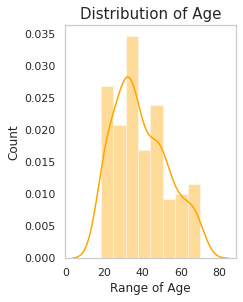

In [24]:
#Analysis of customer age
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'orange')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.grid(False)
plt.show()


The maximum number of customers are in the range of 35-40

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


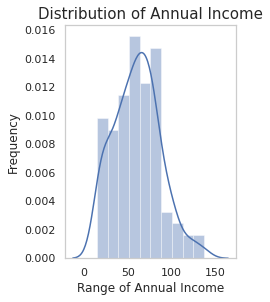

In [25]:
#analysis of income
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


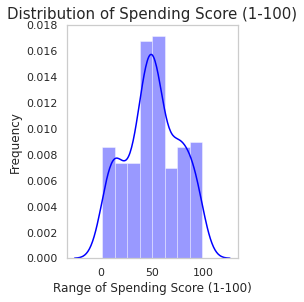

In [28]:
#analysis of spending score
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color = 'blue')
plt.title('Distribution of Spending Score (1-100)', fontsize = 15)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

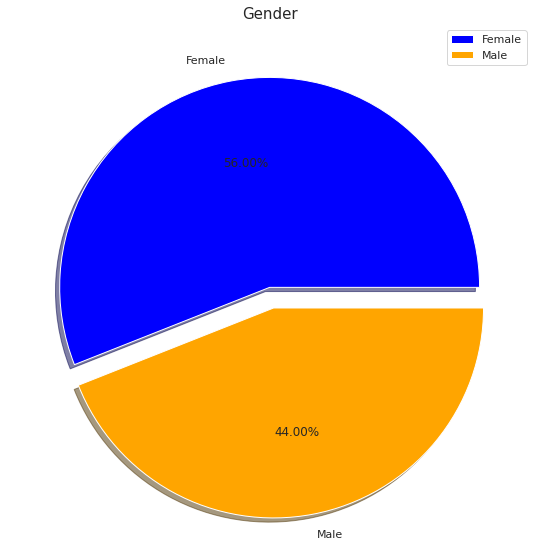

In [29]:
#analysis of gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

In [30]:
average=df["Spending Score (1-100)"].mean()
average

50.2

Text(0, 0.5, 'count')

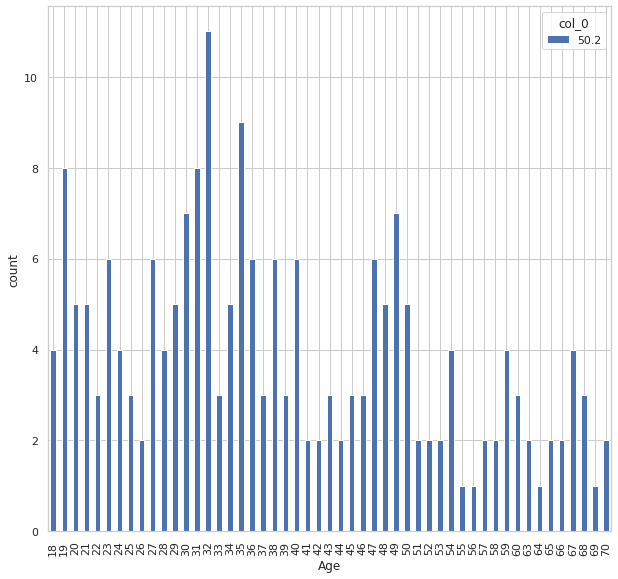

In [36]:
age=df['Age']
avg_spending=average
pd.crosstab(age,avg_spending).plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("count")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


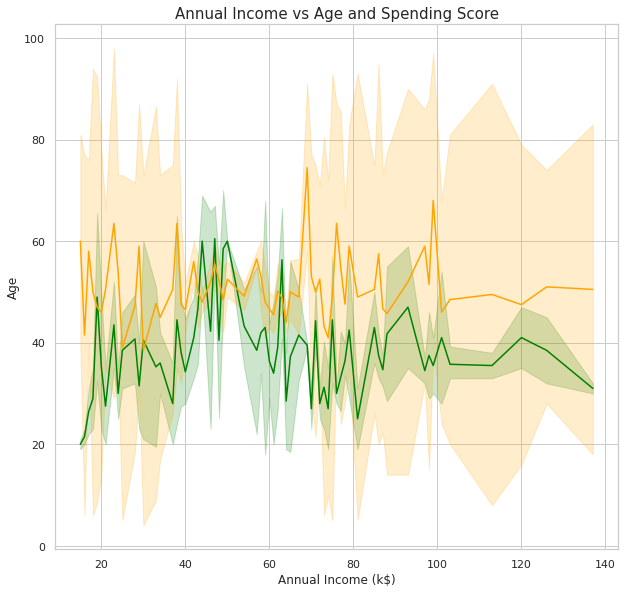

In [38]:
x = df['Annual Income (k$)']
y = df['Age']
z =df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'green')
sns.lineplot(x, z, color = 'orange')
plt.title('Annual Income vs Age and Spending Score', fontsize = 15)
plt.show()

In [39]:
#Now, we must create corrgram to see a correlation coefficient variable
corr_matrix=df.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


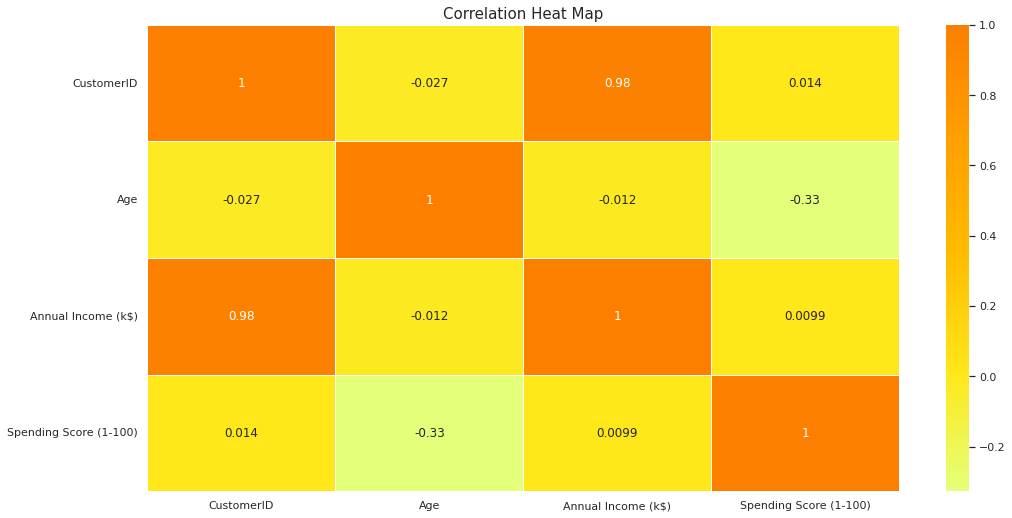

In [41]:
# lets check the Heat Map for the Data with respect to correlation.
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(corr_matrix, annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [45]:
#extract only the important features
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]

STANDARDISATION OF DATA


In [47]:
#Here we are standardizing the data set using standardization method
sc = StandardScaler()
X_df = sc.fit_transform(features) 
scaled_features = pd.DataFrame(X_df, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [54]:
gender = df['Gender']
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


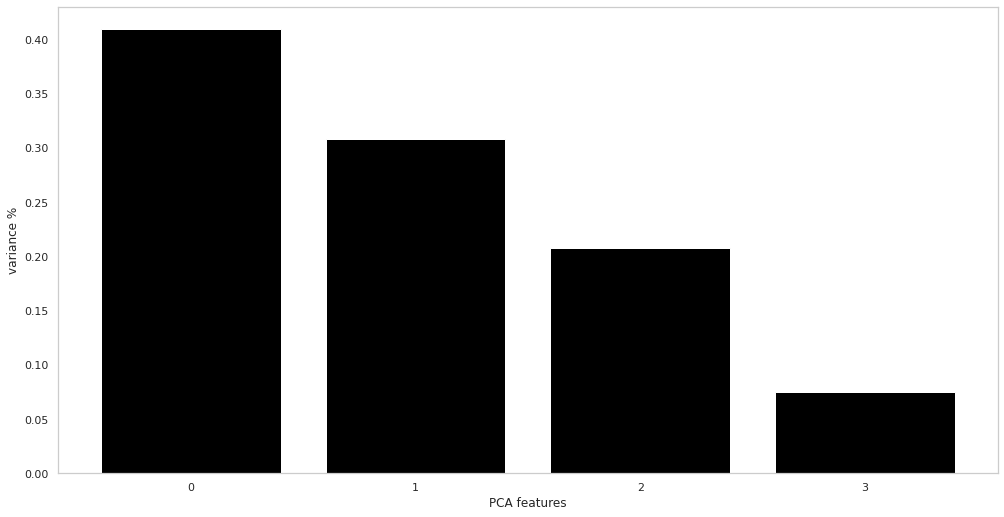

In [55]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.grid(False)
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

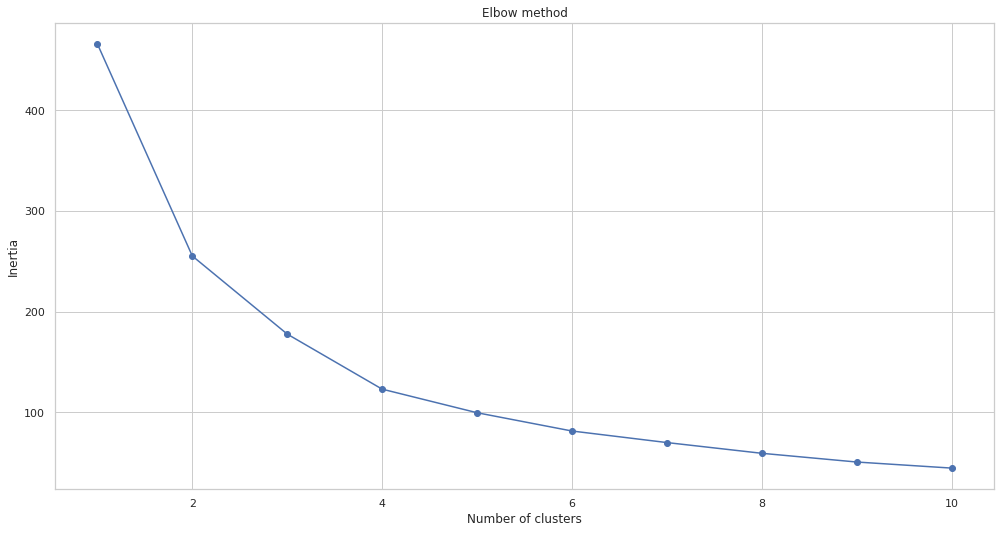

In [56]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA_components.iloc[:,:2])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [72]:
#build a model with 4 clusters
kmeans1 = KMeans( n_clusters = 4, init='k-means++')
kmeans1.fit(PCA_components.iloc[:,:2])


# print the silhouette score of this model
print("silhouette score of PCA features")
print(silhouette_score(PCA_components.iloc[:,:2], kmeans1.labels_, metric='euclidean'))

kmeans2 = KMeans( n_clusters = 4, init='k-means++')
kmeans2.fit(newdf)

print(" ")
# print the silhouette score of this model
print("silhouette score without PCA features")
print(silhouette_score(newdf, kmeans2.labels_, metric='euclidean'))

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score of PCA features
0.42177622653948804
 
silhouette score without PCA features
0.35027020434653977


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Therefore the silhoutte score with PCA Features is better than the one without PCA features so we go with the first model so that we get better clusters

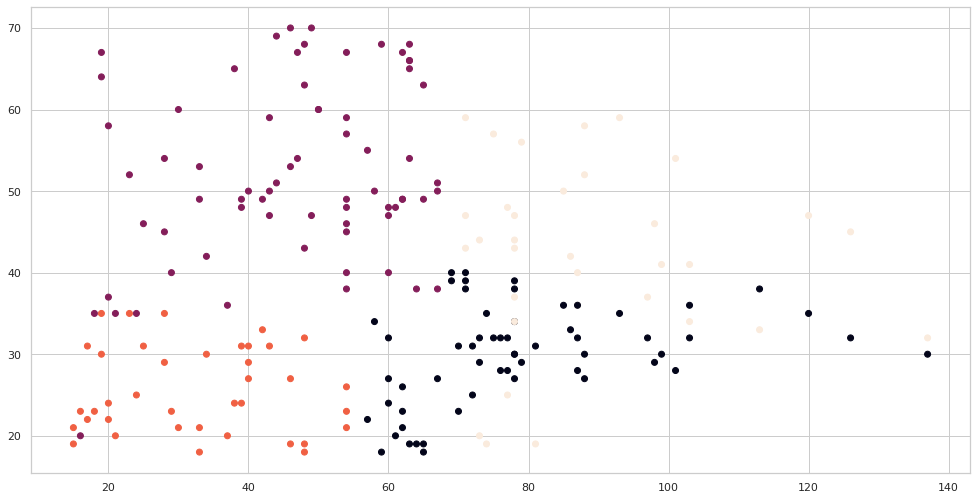

In [73]:
plt.scatter(x, y, c=kmeans1.labels_)
plt.show()

In [74]:
#mapping the clusters back to the dataset
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)
pred = kmeans1.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,2


In [75]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,2


In [83]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.head()
fig=px.bar(avg_df,x='cluster',y='Age',title='Age',color='cluster')
fig.show()

In [84]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.head()
fig=px.bar(avg_df,x='cluster',y='Annual Income (k$)',title='Annual Income (k$)',color='cluster')
fig.show()

In [86]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.head()
fig=px.bar(avg_df,x='cluster',y='Spending Score (1-100)',title='Spending Score (1-100)',color='cluster')
fig.show()

In [92]:
df2 = pd.DataFrame(df.groupby(['cluster','Age','Gender','Spending Score (1-100)'])['cluster'].count())
df2

cluster
cluster Age Gender Spending Score (1-100)         
0       18  Female 48                            1
            Male   41                            1
        19  Female 50                            1
                   54                            1
            Male   46                            1
...                                            ...
3       56  Female 35                            1
        57  Female 5                             1
        58  Male   15                            1
        59  Male   11                            1
                   14                            1

[198 rows x 1 columns]

In [93]:
df2.to_csv('classified_dataframe.csv')